In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dengue.csv')

In [3]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


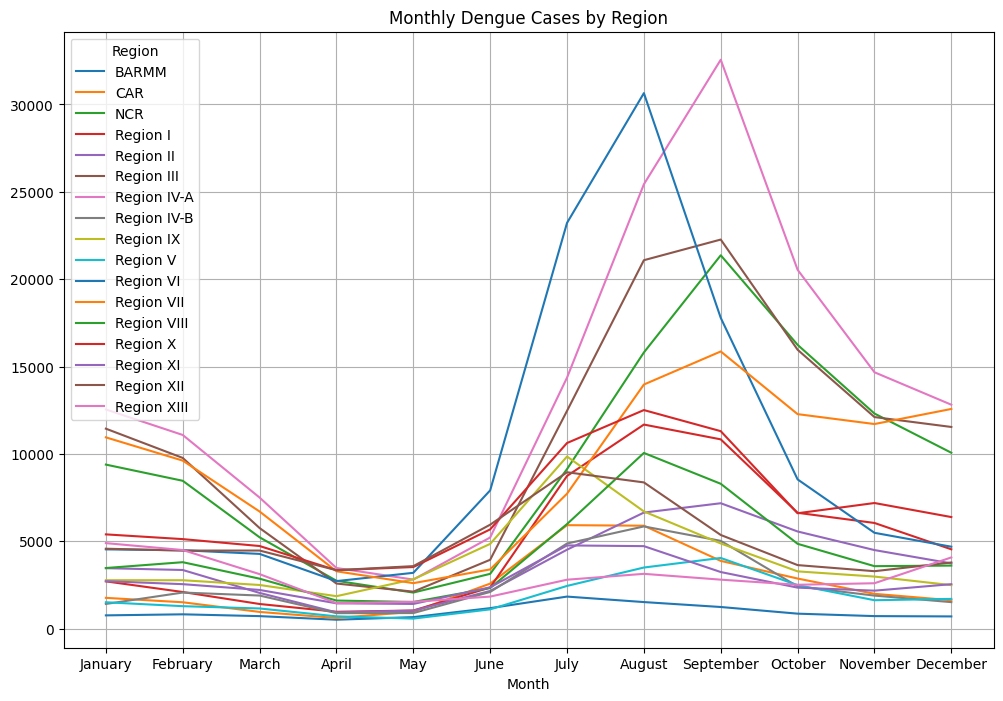

In [4]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

monthly_cases = df.groupby(['Month', 'Region'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line',title='Monthly Dengue Cases by Region')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h1>Insight #1</h1>
<h2>Dengue cases sharply increase starting June, peak around August–September, and decline again by October.
This pattern aligns with the rainy season (June to October), when stagnant water provides ideal breeding sites for mosquitoes.</h2>
<hr>

<Figure size 1300x800 with 0 Axes>

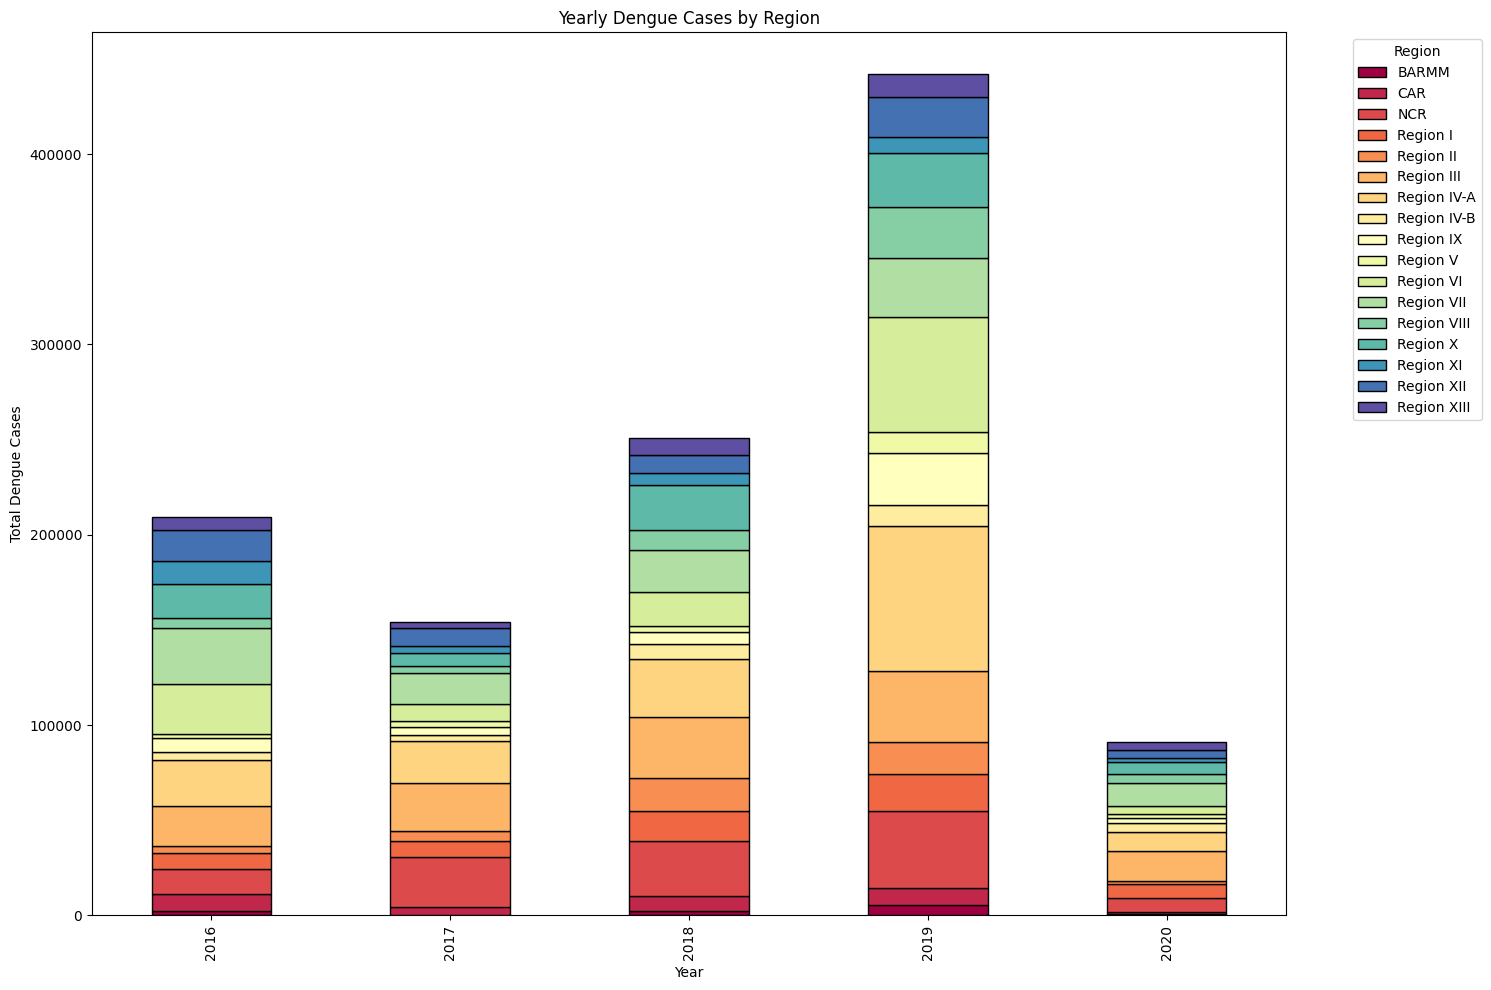

In [5]:
yearly_cases = df.groupby(['Year', 'Region'])["Dengue_Cases"].sum().unstack()

# Plot the yearly trend
plt.figure(figsize=(13, 8))
yearly_cases.plot(kind='bar', stacked=True, figsize=(15, 10),colormap='Spectral', edgecolor='black')

plt.title('Yearly Dengue Cases by Region')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1>Insight #2</h1>
<h2>The total number of dengue cases peaked sharply in 2019, which stands out as an outbreak year compared to the other years.</h2>
<hr>
<h1>Insight #3</h1>
<h2>This aligns with real-world data where 2019 was reported as one of the worst dengue outbreak years in the Philippines, affecting most regions simultaneously.</h2>
<hr>
<h1>Insight #4</h1>
<h2>The sudden drop after 2019 might be attributed to COVID-19 restrictions reducing outdoor exposure and travel.</h2>
<hr>


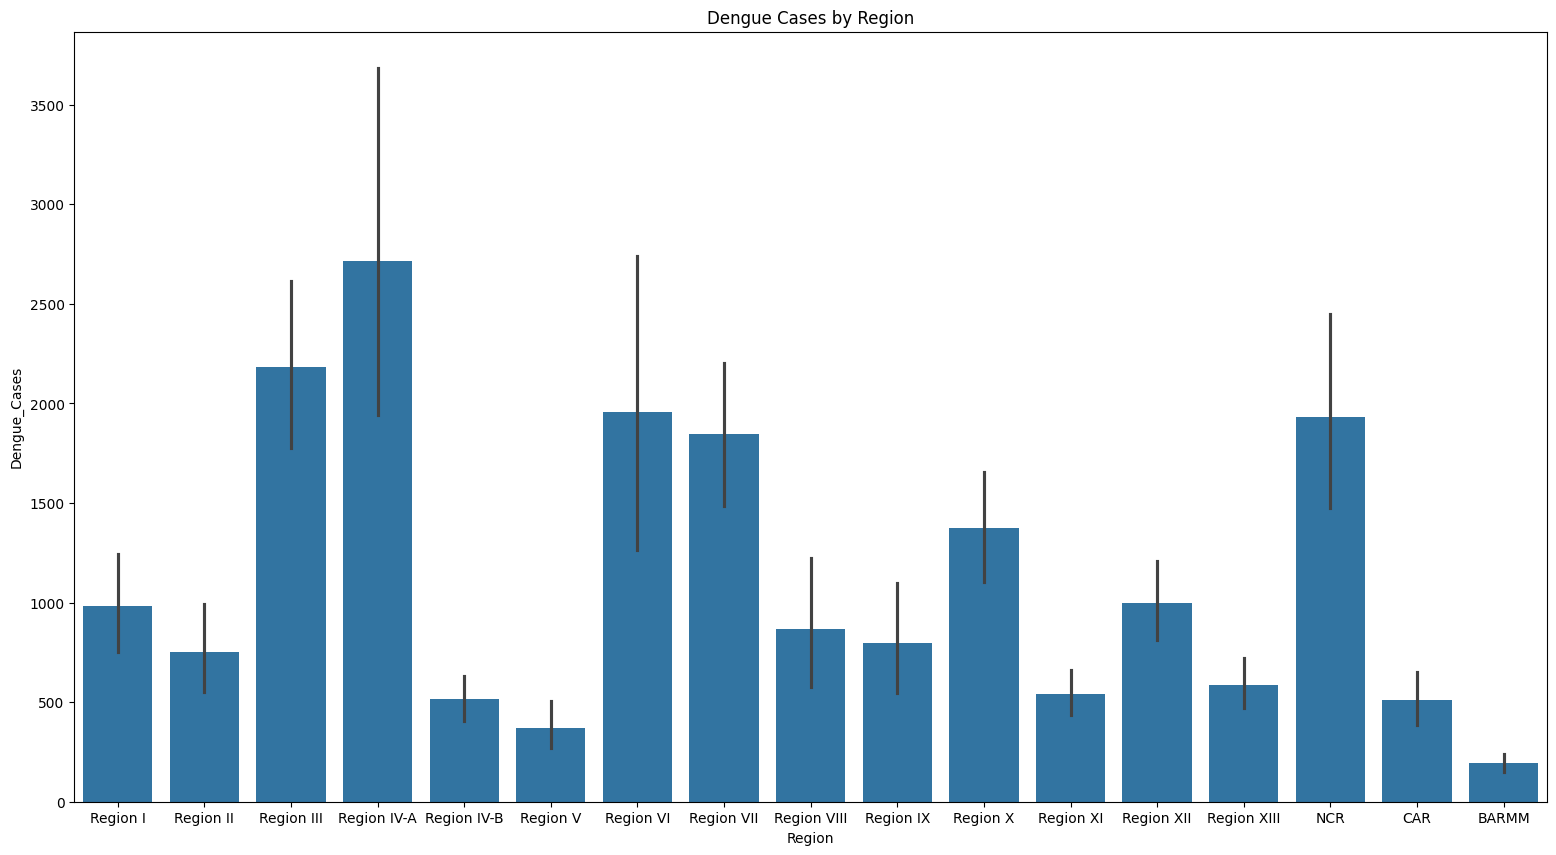

In [6]:
region_case = sns.barplot(data=df, x='Region', y="Dengue_Cases")
plt.title('Dengue Cases by Region')
plt.gcf().set_size_inches(19,10)
plt.show()

<h1>Insight #5</h1>
<h2>Region IV-A (CALABARZON) recorded the highest average dengue cases, followed closely by Region III (Central Luzon), Region VI (Western Visayas), and NCR (National Capital Region).
These regions are highly urbanized and densely populated, creating favorable conditions for mosquito breeding and transmission.</h2>
<hr>
<h1>Insight #6</h1>
<h2>Regions such as Region VII (Central Visayas), Region X (Northern Mindanao), and Region I (Ilocos) show moderate dengue activity, reflecting steady but controlled transmission levels.</h2>
<hr>

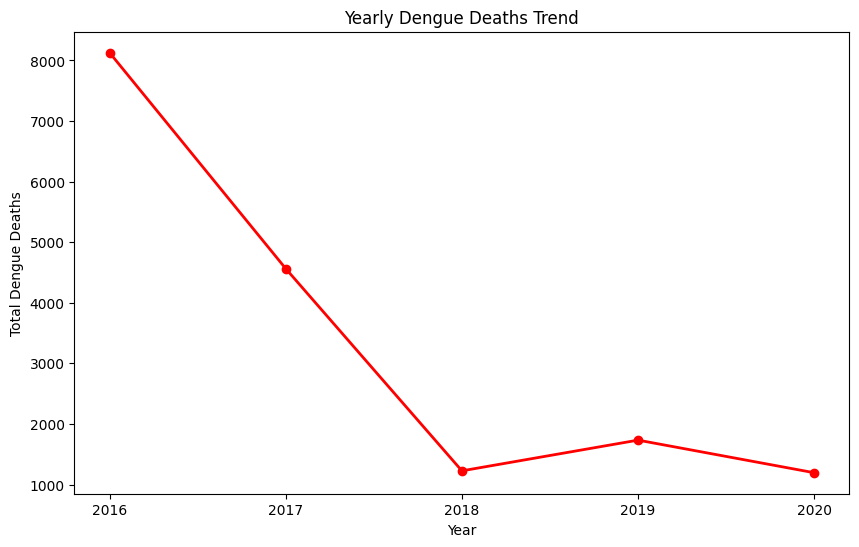

In [7]:
yearly_deaths = df.groupby('Year')['Dengue_Deaths'].sum()

plt.figure(figsize=(10,6))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o', color='red', linewidth=2)
plt.title('Yearly Dengue Deaths Trend')
plt.xlabel('Year')
plt.xticks(range(2016,2021))
plt.ylabel('Total Dengue Deaths')
plt.show()

<h1>Insight #7</h1>
<h2>The data shows a steep decline in dengue deaths from 2016 to 2018, coinciding with the rollout of the Dengvaxia vaccination program during those years. However, reports of adverse effects linked to the vaccine in 2017–2018 led to its suspension by health authorities. As public trust in the vaccine fell, fewer individuals were immunized in 2019, which likely contributed to the sharp increase in dengue cases that year despite relatively low mortality rates.</h2>
<P><i>Source: Department of Health, Philippines / WHO Dengue Situation Report</i></P>
<hr>

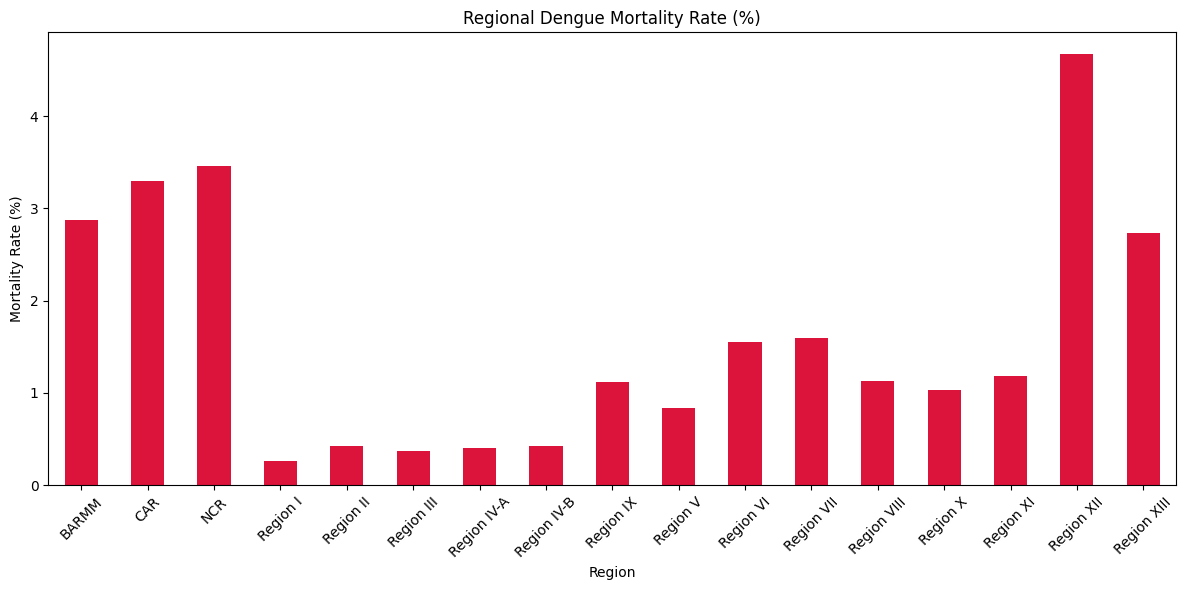

In [8]:
region_mortality = df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
region_mortality['Mortality_Rate'] = (region_mortality['Dengue_Deaths'] / region_mortality['Dengue_Cases']) * 100

plt.figure(figsize=(12,6))
region_mortality['Mortality_Rate'].plot(kind='bar', color='crimson')
plt.title('Regional Dengue Mortality Rate (%)')
plt.xlabel('Region')
plt.ylabel('Mortality Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>Insight #8</h1>
<h2>The chart reveals that Region XII recorded the highest dengue mortality rate in the country, followed by NCR, CAR, and BARMM, indicating potential disparities in healthcare access and response capacity. Regions with lower mortality rates, such as Regions I to IV-A, likely benefited from better medical infrastructure and early case detection.</h2>
<hr>

<Figure size 1500x600 with 0 Axes>

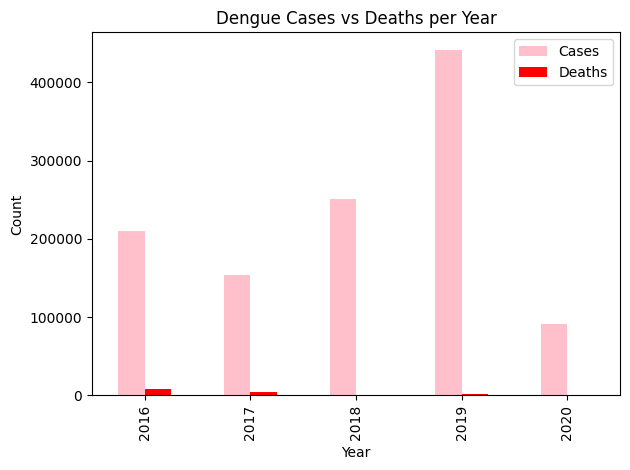

In [9]:
yearly_summary = df.groupby('Year')[['Dengue_Cases','Dengue_Deaths']].sum()

plt.figure(figsize=(15,6))
yearly_summary.plot(kind='bar', color=['pink', 'red'])
plt.title('Dengue Cases vs Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Cases', 'Deaths'])
plt.tight_layout()
plt.show()


<h1>Insight #9</h1>
<h2>While dengue cases surged in 2019, the number of deaths remained comparatively low, suggesting improvements in case management and hospital readiness. The DOH noted that although infection rates climbed sharply, early treatment interventions likely prevented higher mortality.</h2>
<hr>

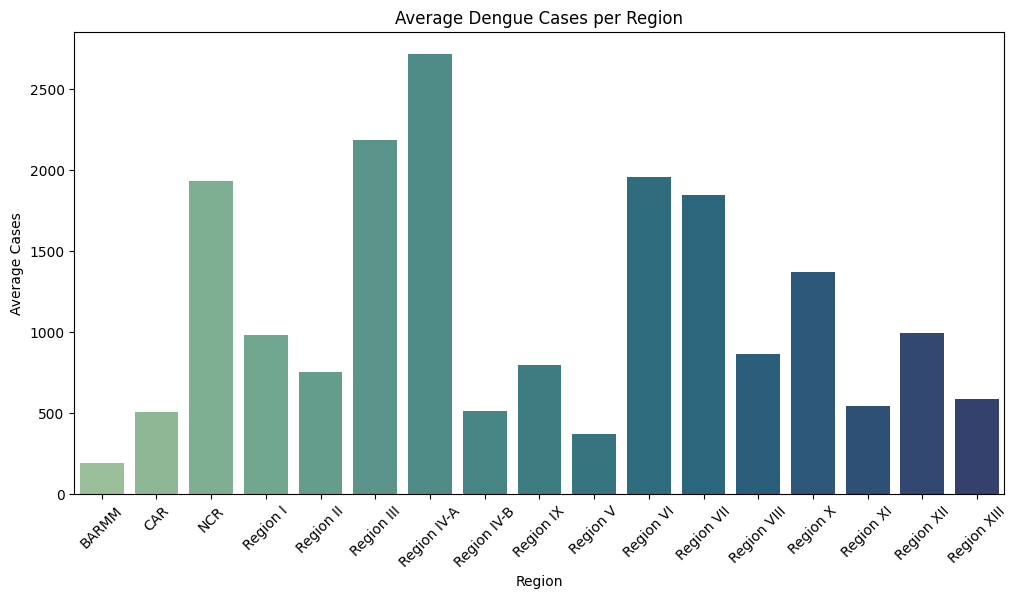

In [10]:
avg_cases = df.groupby('Region')['Dengue_Cases'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_cases.index, y=avg_cases.values, palette='crest')
plt.title('Average Dengue Cases per Region')
plt.xlabel('Region')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)
plt.show()


<h1>Insight #10</h1>
<h2>Regions IV-A (CALABARZON), III (Central Luzon), and VI (Western Visayas) consistently report the highest average dengue cases, mirroring their dense communities and humid climates. These regions remain priority zones for dengue surveillance, according to DOH’s 2020 vector control strategy.</h2>
<hr>